# Table of Contents
### 01: Import Libraries and Data
### 02: Correlations
### 03: Scatterplots
### 04: Pair Plot
### 05: Categorical Plot
### 06: Revisiting Questions
### 07: Hypothesis

# 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/Katherine/Desktop/House Sales'

In [3]:
#Import clean data
df = pd.read_csv(os.path.join(path, 'housing_data_clean.csv'), index_col = False)

# 02. Correlations

In [4]:
df.columns

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#create a subset of data for correlation charts
sub = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'waterfront', 'grade', 'yr_built', 'yr_renovated']]

In [6]:
#create a correlation chart
sub.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,waterfront,grade,yr_built,yr_renovated
price,1.000000,0.308326,0.525146,0.702035,0.089652,0.256893,0.397409,0.266371,0.667541,0.054062,0.126489
bedrooms,0.308326,1.000000,0.515956,0.576640,0.031671,0.175608,0.079411,-0.006591,0.357143,0.154410,0.018678
bathrooms,0.525146,0.515956,1.000000,0.754717,0.087751,0.500754,0.187892,0.063747,0.665029,0.506038,0.050880
sqft_living,0.702035,0.576640,0.754717,1.000000,0.172809,0.354181,0.284627,0.103817,0.762893,0.318253,0.055299
sqft_lot,0.089652,0.031671,0.087751,0.172809,1.000000,-0.005113,0.074744,0.021598,0.113688,0.053154,0.007671
floors,0.256893,0.175608,0.500754,0.354181,-0.005113,1.000000,0.029383,0.023731,0.458074,0.489244,0.006193
view,0.397409,0.079411,0.187892,0.284627,0.074744,0.029383,1.000000,0.401992,0.251426,-0.053196,0.103203
waterfront,0.266371,-0.006591,0.063747,0.103817,0.021598,0.023731,0.401992,1.000000,0.082799,-0.026150,0.092949
grade,0.667541,0.357143,0.665029,0.762893,0.113688,0.458074,0.251426,0.082799,1.000000,0.446887,0.014396
yr_built,0.054062,0.154410,0.506038,0.318253,0.053154,0.489244,-0.053196,-0.026150,0.446887,1.000000,-0.224722


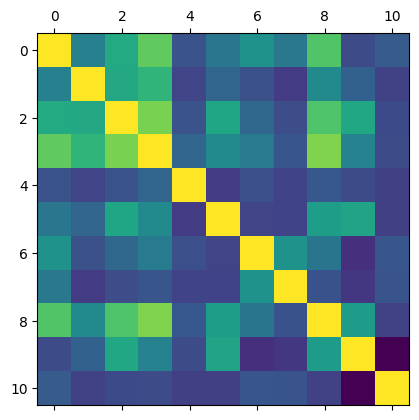

In [7]:
# Create a correlation heatmap
plt.matshow(sub.corr())
plt.show()

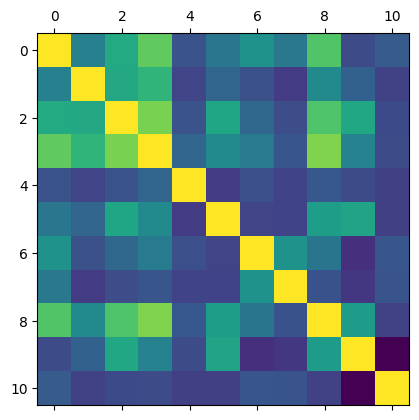

In [8]:
#save heatmap
plt.matshow(sub.corr())
plt.savefig("corr_heatmap.png") 

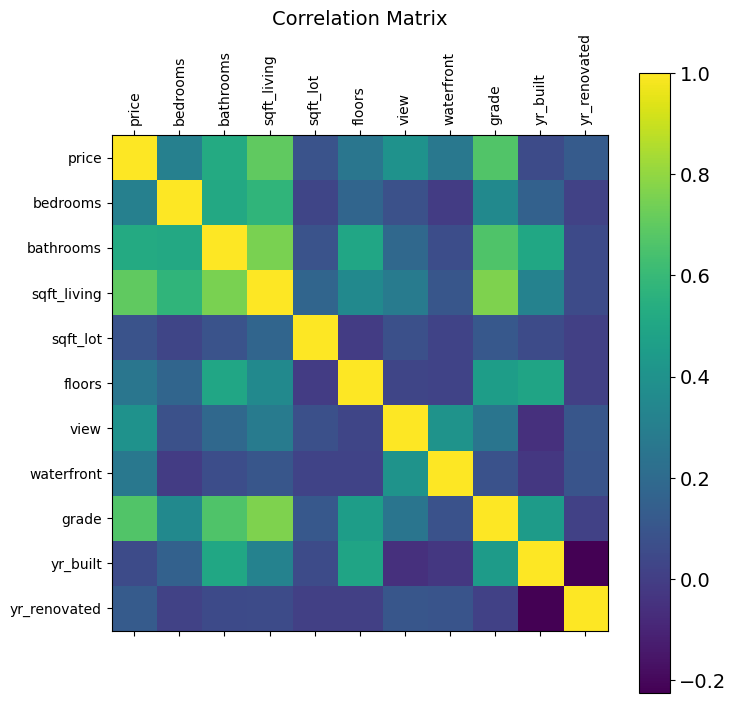

In [9]:
#add labels and a legend for the large correlation map
f = plt.figure(figsize=(8,8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("corr_heatmap.png") #save heatmap

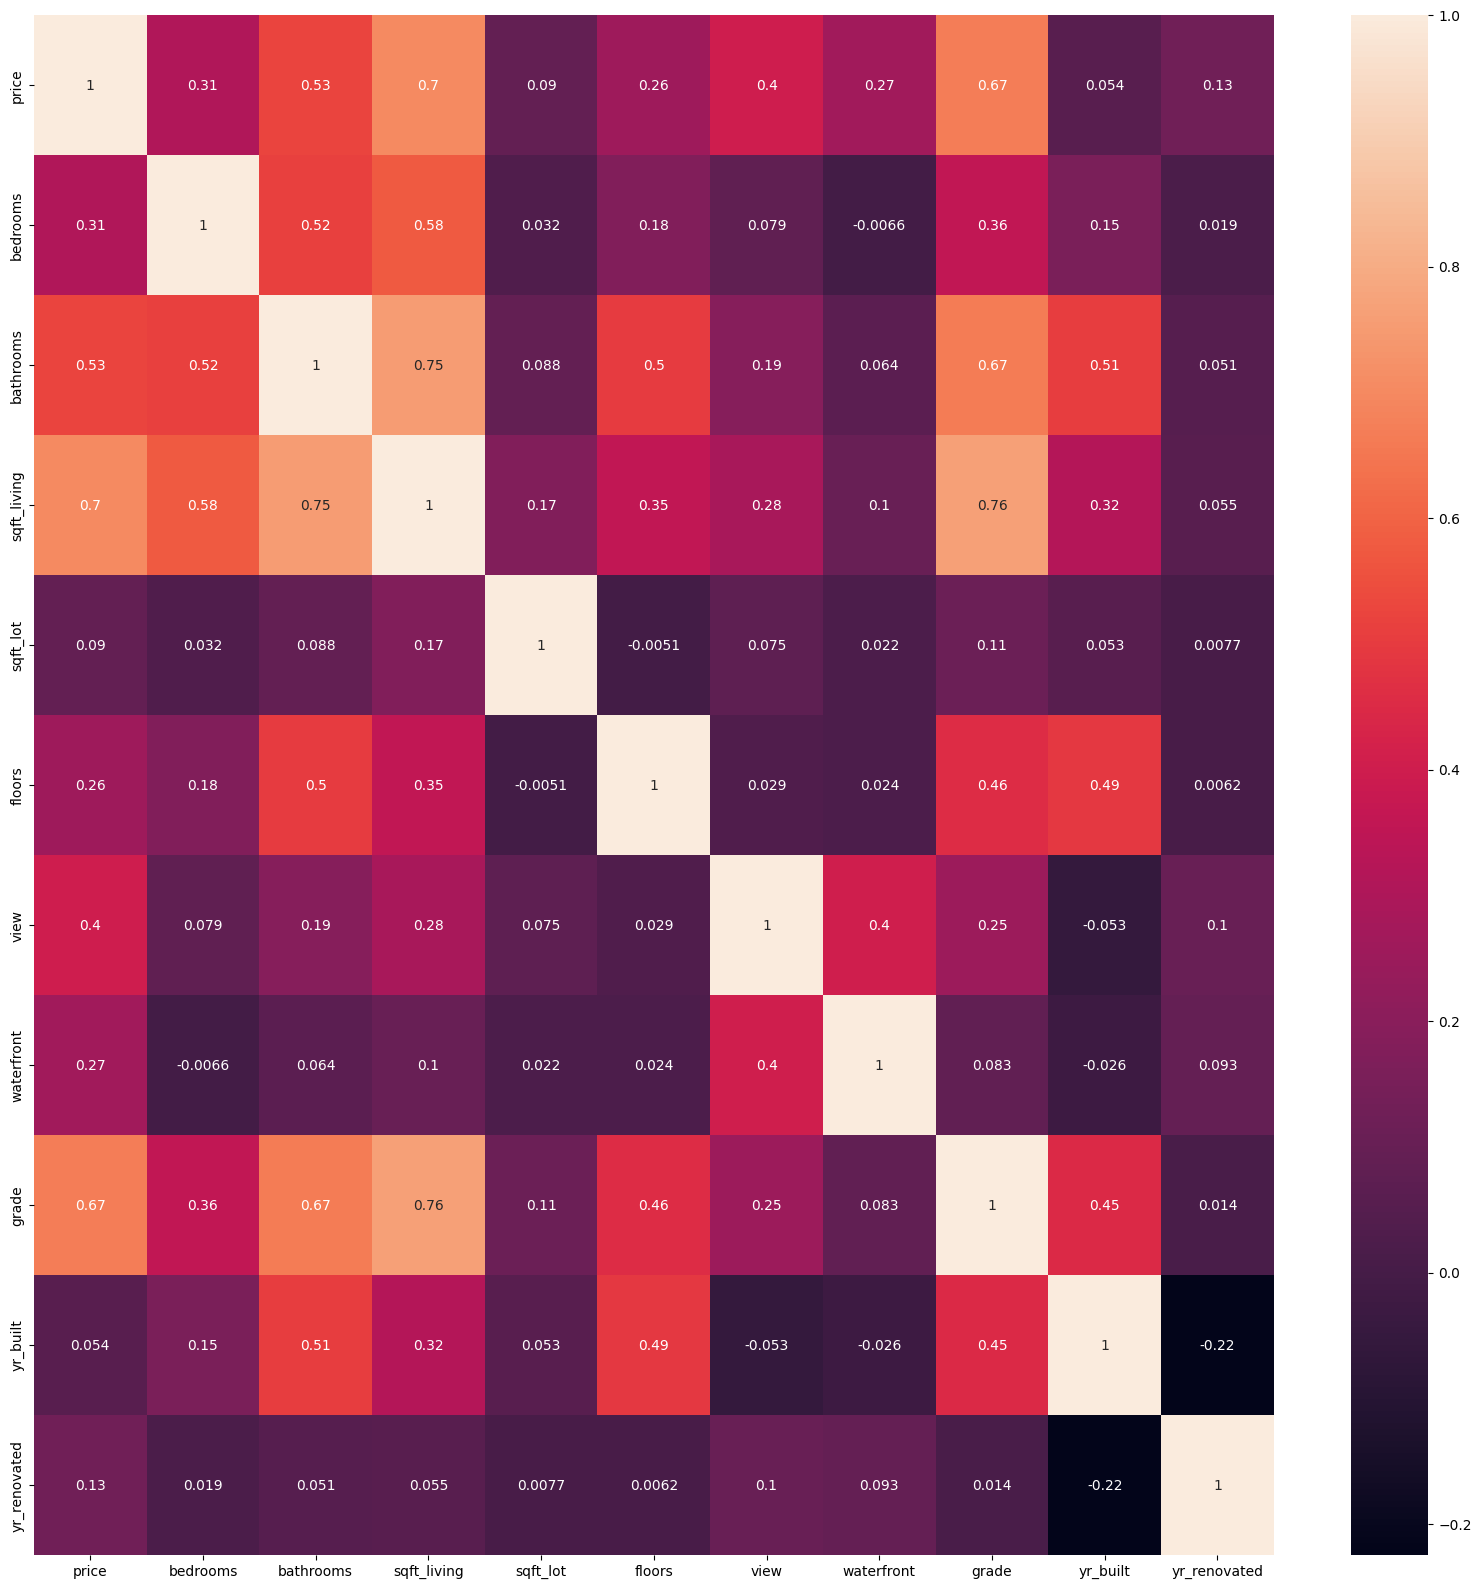

In [10]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(20,20))

#Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

plt.savefig("corr_matrix.png") #save correlation matrix

The strongest correlations are between price and square foot/bathrooms/view/grade and then a strong correlation between grade and living room square foot. It makes sense that the higher the grade or square footage, the higher the price since that's what most people feel their money is going towards when buying a house. It's interesting that the square foot of the living space has a strong correlation, but the square foot of the lot itself does not. 

# 03. Scatterplots

In [11]:
sub.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'waterfront', 'grade', 'yr_built', 'yr_renovated'],
      dtype='object')

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


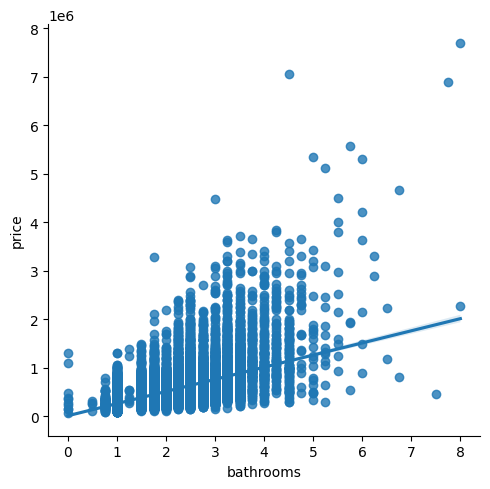

In [12]:
#create scatterplot for the "price" and "bathrooms" columns 

sns.lmplot(x = 'bathrooms', y = 'price', data = sub)

Typically, the more bathrooms the house has the higher the price of the house will be.

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


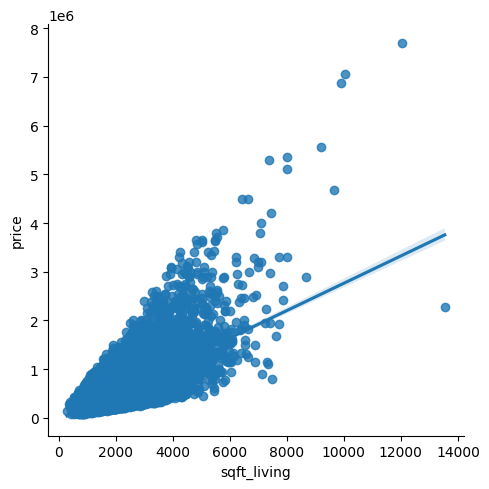

In [13]:
#create scatterplot for the "price" and "living space sqft" columns 

sns.lmplot(x = 'sqft_living', y = 'price', data = sub)

The bigger the living space, the higher the price of the house--though most homes are under 8000 sqft.

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


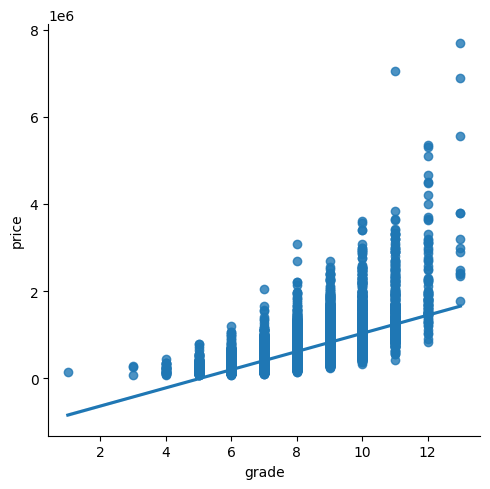

In [14]:
#create scatterplot for the "price" and "grade" columns 

sns.lmplot(x = 'grade', y = 'price', data = sub)

The building grade represents the construction quality of improvements, so it makes sense that the higher the grade of the property, the higher the price of the home. 

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


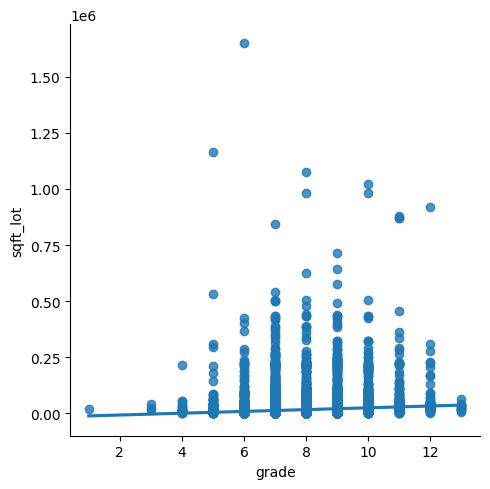

In [15]:
#create scatterplot for the "sqft_lot" and "grade" columns 

sns.lmplot(x = 'grade', y = 'sqft_lot', data = sub)

Middle-grade homes appear to have the biggest square footage lots. 

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


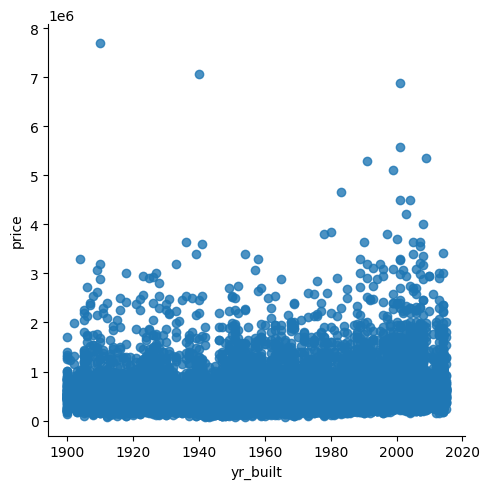

In [16]:
#create scatterplot for the "yr_built" and "price" columns 

sns.lmplot(x = 'yr_built', y = 'price', data = sub)

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


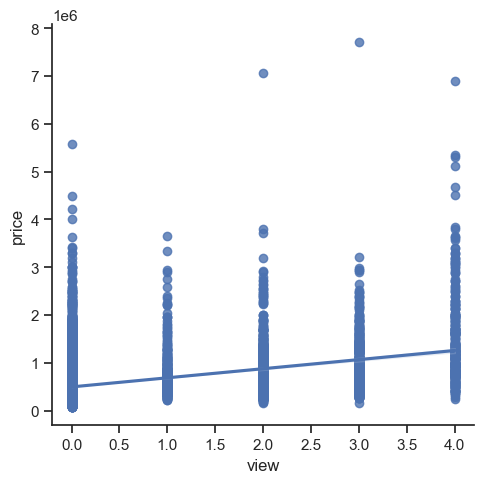

In [20]:
#create scatterplot for the "view" and "price" columns 
sns.lmplot(x = 'view', y = 'price', data = sub)

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


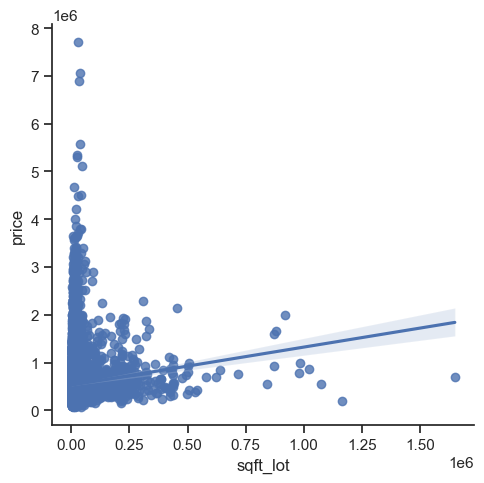

In [22]:
#create scatterplot for the "price" and "lot sqft" columns 
sns.lmplot(x = 'sqft_lot', y = 'price', data = sub)

# 04. Pair Plot

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


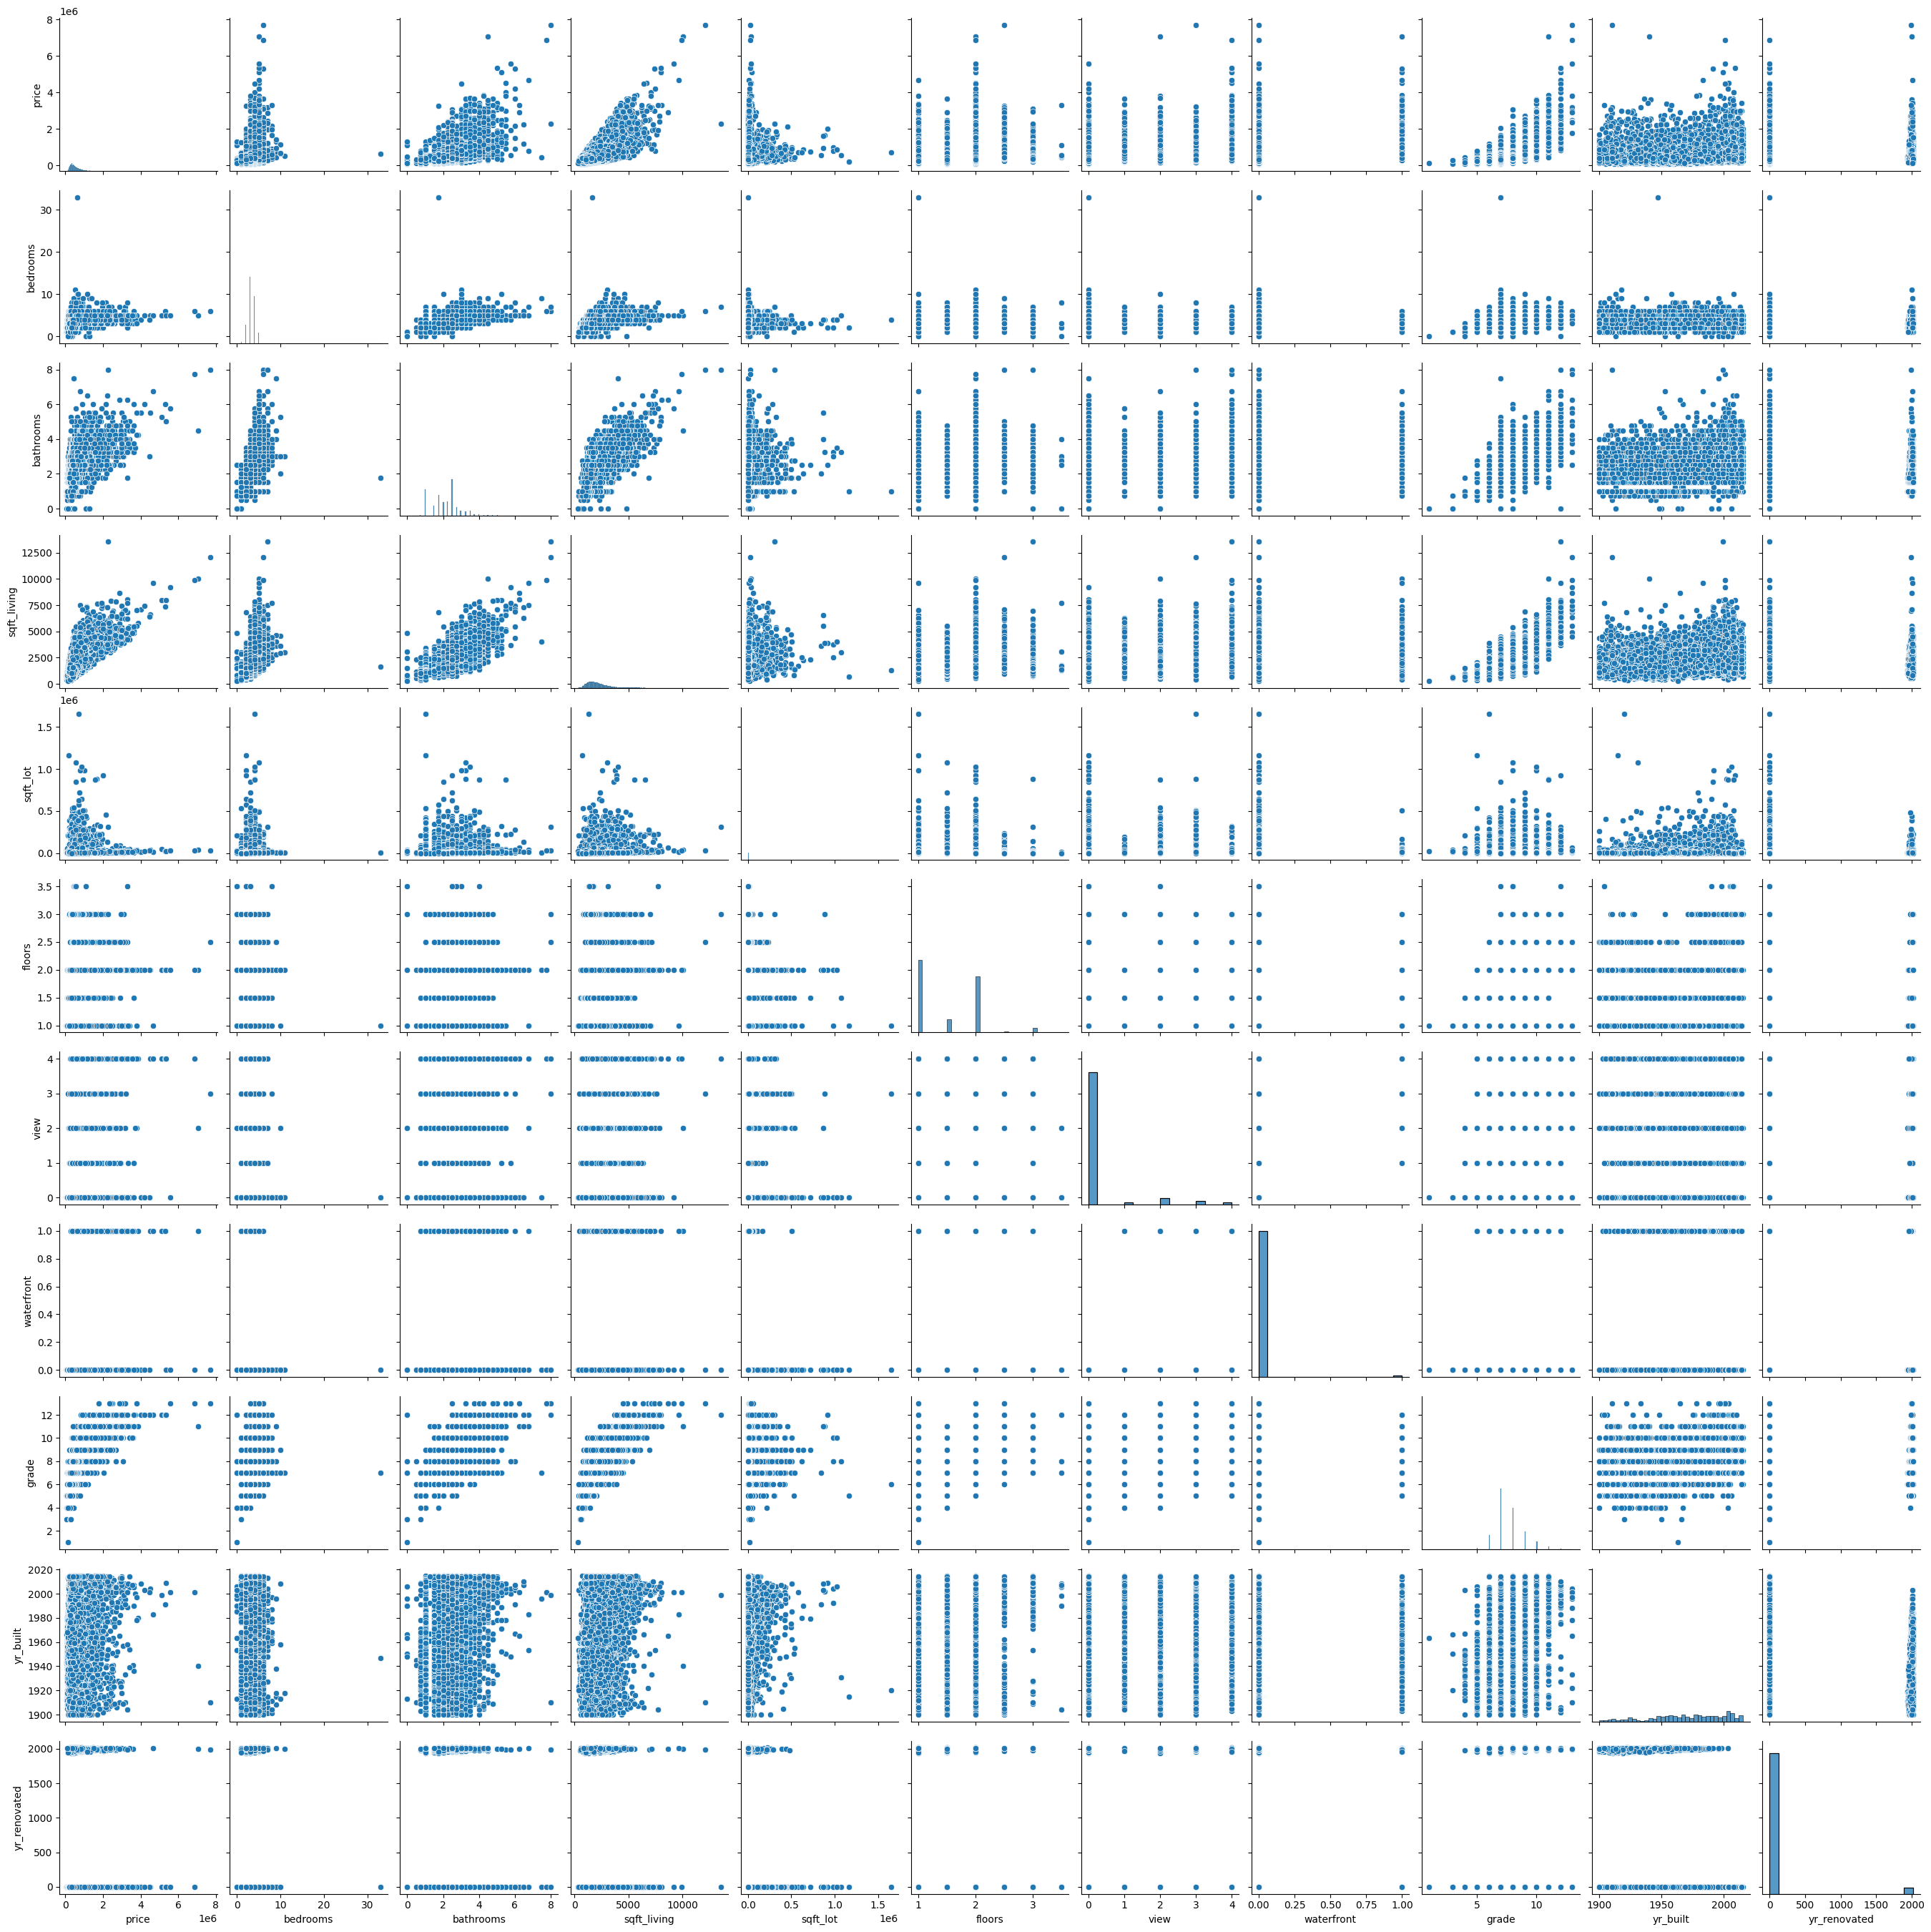

In [18]:
# Create a pair plot of entire dataset
pairplot = sns.pairplot(sub)

Based on the pair plots:
-Number of bathrooms has more effect on price than bedrooms
-There is a steady increase in price as the living space square footage goes up
-The bigger the lot square footage, the lower the price
-Year built does not affect the price of the house
-The higher the building grade, the higher the price
-The higher the building grade, the more bedrooms the house has
-The middle-grade buildings have the biggest lot square footage, but the higher grade homes have a bigger living square footage
-Houses built more recently have bigger lot square footage

# 05. Categorical Plot

In [19]:
sub.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,waterfront,grade,yr_built,yr_renovated
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.400984e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.234219,0.007544,7.656655,1970.999907,84.330155
std,3.671646e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.766169,0.086527,1.175484,29.371463,401.517026
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1900.000000,0.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,7.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,8.000000,1997.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,1.000000,13.000000,2015.000000,2015.000000


<Axes: xlabel='price', ylabel='Count'>

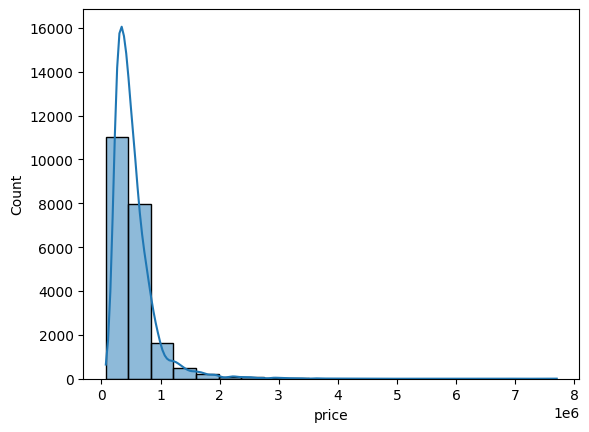

In [20]:
#create histogram of price
sns.histplot(df['price'], bins = 20, kde = True)

In [21]:
#see mean home price
df.loc[:, 'price'].mean()

540098.3690299889

<Axes: xlabel='grade', ylabel='Count'>

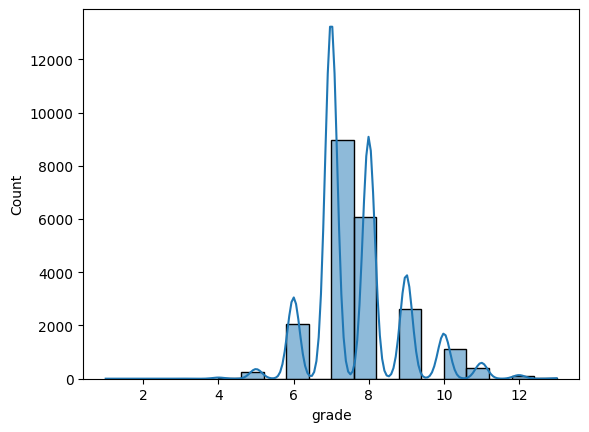

In [5]:
#create histogram of grade
sns.histplot(df['grade'], bins = 20, kde = True)

In [6]:
df.loc[df['grade'] < 4, 'Grade Category'] = 'Low Grade'

In [7]:
df.loc[(df['grade'] >= 4) & (df['grade'] < 9), 'Grade Category'] = 'Middle Grade'

In [8]:
df.loc[df['grade'] >= 9, 'Grade Category'] = 'High Grade'

In [9]:
df['Grade Category'].value_counts(dropna = False)

Grade Category
Middle Grade    17356
High Grade       4248
Low Grade           4
Name: count, dtype: int64

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


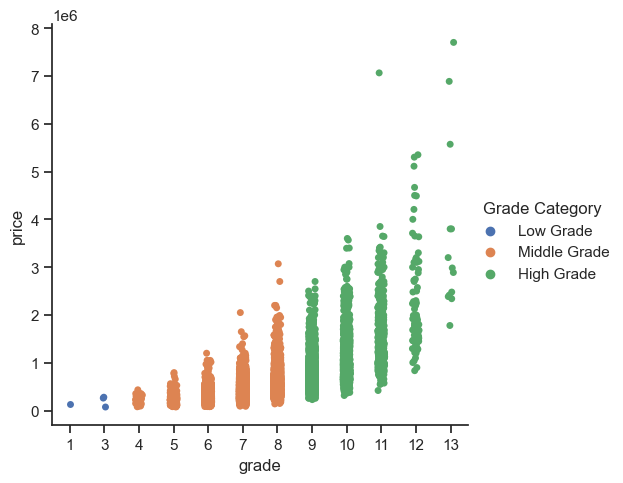

In [16]:
#Create a categorical plot using the grade categories created above
sns.set(style="ticks")
catplot = sns.catplot(x="grade", y="price", hue="Grade Category", data=df)

Higher grade houses sell for a higher price.

In [17]:
#save categorical plot
catplot.savefig("gradecatplot.png") 

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


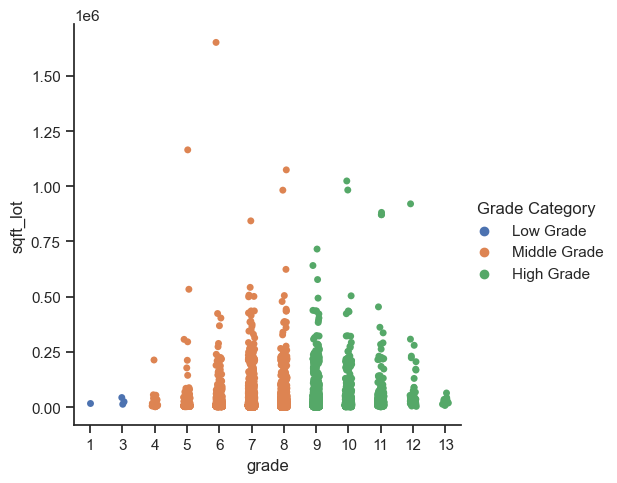

In [23]:
#Create a categorical plot using the grade categories created above
sns.set(style="ticks")
catplot = sns.catplot(x="grade", y="sqft_lot", hue="Grade Category", data=df)

The biggest lot square footage is from middle to high grade houses.

/Users/katherine/anaconda3/envs/update/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


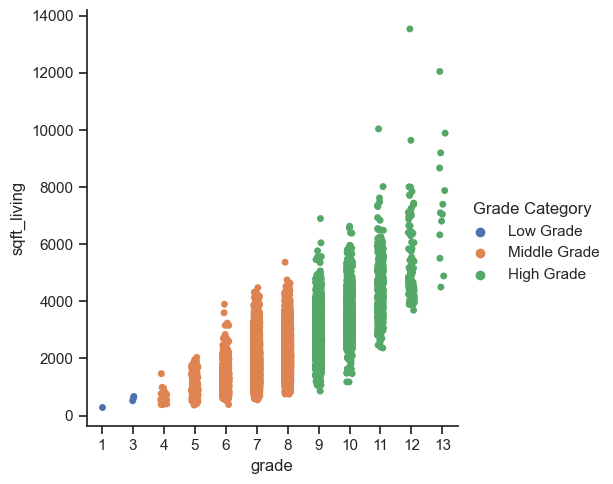

In [24]:
#Create a categorical plot using the grade categories created above
sns.set(style="ticks")
catplot = sns.catplot(x="grade", y="sqft_living", hue="Grade Category", data=df)

As the grade score goes up, the squarefoot of living space also goes up.

# 06: Revisiting Questions

Is the view a major component for the price of a house?
Based on the scatterplot, some homes with a better view sell at a higher price point, but it is not the biggest factor.

How important in the square footage to house prices? It appears that the lot size does not necessarily contribute to an increase in housing prices, but the bigger the living square footage, the higher the price.

Does house built year affect the price of a house? While some of the newer homes built after 1980 have an increased price, it is not a major factor in determining the price point of a house.

# 07: Hypothesis

Hypothesis 1: In houses that have a higher living square footage, the prices will be higher.

Hypothesis 2: Houses that have a higher build grade will be listed at a higher price point.

Hypothesis 3: The more recent the house was built, the higher the lot square footage will be.